# SI 618 Homework 5 - Natural Language Processing

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. Questions 1 through 6 are worth 10 points each; Question 7 is worth 20 points.

## Background

(From https://www.kaggle.com/headsortails/us-election-2020-presidential-debates.)

The US 2020 election saw the incumbent Republican president Donald Trump facing off against his Democrat challenger Joe Biden. Both candidates agreed to debate their political stances in the lead-up to the vote on November 3rd.

The 1st debate took place on September 29th at Case Western Reserve University in Cleveland, Ohio. It was moderated by Fox News anchor Chris Wallace. 

After Donald Trump tested positive for Covid-19 after his first debate and subsequently recovered, the 2nd presidential debate was initially converted into a virtual event. However, Trump declined to participate in a virtual debate and the event was transformed into a (socially distanced) town hall with Joe Biden alone. This event was moderated by George Stephanopoulos on the ABC network and took place on October 15th. Donald Trump then decided to hold a town hall of his own, which took place at the same day and time as the Biden town hall and was aired on NBC. This event was moderated by Savannah Guthrie.

The actual 2nd, and final, presidential debate between Biden and Trump took place on October 22nd at Belmont University, Nashville, Tennessee and was moderated by NBC News' Kristen Welker. This debate implemented stricter conditions on the candidates' speaking times to limit the frequent interruptions that had characterised the 1st debate.

The goal of this homework assignment is to investigate the transcripts of those events.

The data files are available via https://github.com/umsi-data-science/data/tree/main/us_election_2020.  Note that each file is available in two formats: CSV and TXT. You can work from either format -- the content of the corresponding CSV and TXT files is the same.

You can either use the correct URLs to the Raw version of the data files like we've done with other data files in the course so far, you can fork the repo if you're comfortable with ```git```, or you can click on each file and then view the "Raw" format and download the resulting file.  You do not need the us_election_2020_vice_presidential_debate files as we are only concerned with the presidential debates and town halls for this assignment.

Note that *you* will need to make decisions about how you
proceed with the analysis.  For example, you will need to 
decide whether you include or omit stopwords, whether you stem or lemmatize words before analysis, and how you handle weird situations.

You will need to decide when to exclude speech from the moderators and when to include it (note that in most cases, the assignment asks about the candidates, which means Trump and Biden and not the moderators).

Please fill in your uniqname in the next code cell:

In [79]:
MY_UNIQNAME = "natmay"

Answer each of the questions below.  You are encouraged to use as many code and markdown cells as you need for each question.

We **strongly** suggest running all cells from top to bottom before you submit your notebook.

In [80]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from collections import Counter
import spacy
nlp = spacy.load('en_core_web_sm')

In [81]:
base = 'https://raw.githubusercontent.com/umsi-data-science/data/main/us_election_2020/'

## 1. How many words did each candidate (Trump & Biden) use in each debate?

In [82]:
first = pd.read_csv(base + 'us_election_2020_1st_presidential_debate.csv')
second = pd.read_csv(base + 'us_election_2020_2nd_presidential_debate.csv')
first.head(3)

,speaker,minute,text
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...
1,Chris Wallace,02:10,This debate is being conducted under health an...
2,Vice President Joe Biden,02:49,"How you doing, man?"


In [83]:
debates = pd.concat([first, second])
debates.speaker.unique()

array(['Chris Wallace', 'Vice President Joe Biden',
       'President Donald J. Trump', 'Chris Wallace:', 'Kristen Welker',
       'Donald Trump', 'Joe Biden'], dtype=object)

In [84]:
trump = debates[debates.speaker.str.contains('Trump')]
biden = debates[debates.speaker.str.contains('Biden')]

In [85]:
trump_text = trump.text.str.cat(sep=' ').lower()
biden_text = biden.text.str.cat(sep=' ').lower()

In [86]:
def remove_puc(text):
    result = ''
    for char in text:
        if char not in '''!()-[]{};:'"\,<>./?@#$%^&*_~‘’''':
            result = result + char
    return result.replace(os.linesep, " ")


biden_text = remove_puc(biden_text)

In [87]:
trump_text = remove_puc(trump_text)
trump_words = trump_text.split(' ')
len(trump_words)
print('Trump used', len(trump_words), 'total words,', len(set(trump_words)), 'of which were unique')

Trump used 14836 total words, 1803 of which were unique


In [88]:
biden_text = remove_puc(biden_text)
biden_words = biden_text.split(' ')
print('Biden used', len(biden_words), 'total words,', len(set(biden_words)), 'of which were unique')

Biden used 13788 total words, 2002 of which were unique


Assumptions: 

1. I did not include the town halls since they are not considered a 'debate' according to the paragraph above
2. I included stop words
3. I calculated both the total instances of words as well as the number of unique words.

Answer: 

- Trump used 14836 total words, 1803 of which were unique
- Biden used 13788 total words, 2002 of which were unique


## 2. How many turns speaking did each candidate (Trump & Biden) take during each of the debates?

A "turn" is an uninterrupted period of speech.  For example, consider the following exchange:

>Chris: Big data is really interesting.

>Colleague: Actually, it's a bit boring.

>Chris: Really? Why would you say that?

>Colleague: Your choice of tools is really limited.

>Colleague: I mean, you're basically stuck with Spark, right?

>Chris: Yeah, but Spark provides most of the functionality you need to do really cool data science work.

In it, Chris had 3 turns, while his colleague had 2.

You answer should include a dataframe that looks like (with the real values instead of $__$:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>First Debate</th>
      <th>Second Debate</th>
    </tr>
    <tr>
      <th>Candidate</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Trump</th>
      <td>__</td>
      <td>__</td>
    </tr>
    <tr>
      <th>Biden</th>
      <td>__</td>
      <td>__</td>
    </tr>
  </tbody>
</table>
</div>

In [89]:
# drop na values
times1 = first.dropna(subset=['minute']).copy()
times2 = second.dropna(subset=['minute']).copy()

In [90]:
# ensure the hour is represented
times1.loc[times1['minute'].str.len() < 6, 'minute'] = '00:' + times1['minute']
times2.loc[times2['minute'].str.len() < 6, 'minute'] = '00:' + times2['minute']

In [91]:
# create columns for sorting
times1['h'] = times1['minute'].str[:2]
times1['m'] = times1['minute'].str[3:5]
times1['s'] = times1['minute'].str[6:]

times1 = times1.sort_values(by=['h', 'm', 's']).reset_index(drop=True)
times1

,speaker,minute,text,h,m,s
0,President Donald J. Trump,00:00:15,"Well, I’ve spoken to the companies and we can ...",00,00,15
1,Vice President Joe Biden,00:00:22,God.,00,00,22
2,President Donald J. Trump,00:00:23,It is a very political thing. I’ve spoken to P...,00,00,23
3,Chris Wallace,00:00:38,So you’re suggesting that the head of your Ope...,00,00,38
4,President Donald J. Trump,00:00:42,"I disagree with him. No, I disagree with both ...",00,00,42
...,...,...,...,...,...,...
783,Chris Wallace,01:10:43,"Gentlemen, just say that’s the end of it [cros...",01,10,43
784,President Donald J. Trump,01:10:47,I want to see an honest ballot count.,01,10,47
785,Chris Wallace,01:10:48,We’re going to leave it there-,01,10,48
786,President Donald J. Trump,01:10:49,And I think he does too-,01,10,49


In [92]:
times2['h'] = times2['minute'].str[:2]
times2['m'] = times2['minute'].str[3:5]
times2['s'] = times2['minute'].str[6:]
times2 = times2.sort_values(by=['h', 'm', 's']).reset_index(drop=True)
times2

,speaker,minute,text,h,m,s
0,Donald Trump,00:00:00,They both want you to lose because there has b...,00,00,00
1,Joe Biden,00:00:00,"Making sure that you, in fact, if you get pull...",00,00,00
2,Kristen Welker,00:00:18,"Good evening, everyone. Good evening. Thank yo...",00,00,18
3,Donald Trump,00:00:33,"And I’ll tell you, they were so bad. They took...",00,00,33
4,Kristen Welker,00:01:06,"President Trump, same question to you, and let...",00,01,06
...,...,...,...,...,...,...
507,Kristen Welker,00:38:30,Let’s move on to the next section.,00,38,30
508,Joe Biden,00:38:32,That’s right. And you 525 kids not knowing whe...,00,38,32
509,Donald Trump,00:38:36,Go ahead.,00,38,36
510,Kristen Welker,00:38:37,"All right. Let’s talk about our next section, ...",00,38,37


Having sorted by time, I don't think that the dialog is correct leading me to think that the times were recorded incorrectly. However, the rows seem to be ordered correctly after manually investigating. I will assume that the rows are in the correct order moving forward. 

In [93]:
first.speaker.unique()

array(['Chris Wallace', 'Vice President Joe Biden',
       'President Donald J. Trump', 'Chris Wallace:'], dtype=object)

In [94]:
# correcting data entry issue
first.loc[first.speaker == 'Chris Wallace:', 'speaker'] = 'Chris Wallace'

In [95]:
turns1 = {
    'Chris Wallace': 0, 
    'Vice President Joe Biden': 0,
    'President Donald J. Trump': 0,
}
previous = ''
for index, row in first.iterrows():
    current = row['speaker']
    if not current == previous:
        turns1[current] = turns1[current] + 1
        previous = current

df_first = pd.DataFrame(data=turns1.items())
df_first['Debate'] = 'First Debate'
df_first

,0,1,Debate
0,Chris Wallace,223,First Debate
1,Vice President Joe Biden,240,First Debate
2,President Donald J. Trump,305,First Debate


In [96]:
second.speaker.unique()

array(['Kristen Welker', 'Donald Trump', 'Joe Biden'], dtype=object)

In [97]:
turns2 = {
    'Kristen Welker': 0, 
    'Donald Trump': 0,
    'Joe Biden': 0, 
}
previous = ''
for index, row in second.iterrows():
    current = row['speaker']
    if not current == previous:
        turns2[current] = turns2[current] + 1
        previous = current
        
df_second = pd.DataFrame(data=turns2.items())
df_second['Debate'] = 'Second Debate'
df_second

,0,1,Debate
0,Kristen Welker,185,Second Debate
1,Donald Trump,169,Second Debate
2,Joe Biden,113,Second Debate


In [98]:
df_turns = pd.concat([df_first, df_second])
df_turns['Candidate'] = df_turns[0].str[-5:]
df_turns.drop(columns=[0], inplace=True)
df_turns = df_turns[(df_turns['Candidate'] == 'Biden') | (df_turns['Candidate'] == 'Trump')]
df_turns.set_index(['Candidate', 'Debate']).unstack()

1              
Debate    First Debate Second Debate
Candidate                           
Biden              240           113
Trump              305           169

I'm not 100% confident about the order of the statements. The best I can tell, the time into the debates (the minute column) was reset at some point in each. When I reordered by the state time, the conversation was clearly out of order. Instead, I operated with the assumption that the order given by the index was the order in which the statements were made.

With this, I calculated that Biden spoke 240 times uninterrupted times, and Trump spoke 305 times.

The second debate data set seemed to be much shorter, and perhaps in complete, leaving Biden with only 113 speaking instances to Trump's 169.

## 3. How many different nouns did each candidate (Trump & Biden) use in each of the debates?  

Present your results using a visualization (hint: a simple bar chart, with one bar per candidate per debate would be a good choice; you should decide whether you want to somehow stack or group the bars in your bar chart, or just leave them all side by side). You do not need to report **which** nouns were used.  Provide a written interpretation of your visualization.

In [99]:
def concat_text(df):
    return remove_puc(df.text.str.cat(sep=' ').lower())
    
def create_token_df(df):
    # concat all in text column and remove punctuation
    text = concat_text(df)

    # use spacy to get token data and store in dataframe
    doc = nlp(text)
    tokens = []

    for token in doc:
        if not token.is_space:
            tokens.append([token.text, token.lemma_, token.pos_])
            
    return pd.DataFrame(np.array(tokens), columns=['text', 'lemma', 'POS'])
    
    
def count_unique_nouns(df):
    return len(df[df['POS'].isin(['NOUN', 'PROPN'])].text.unique())
    
    
def noun_pipeline(df):
    tokens = create_token_df(df)
    return count_unique_nouns(tokens)


In [100]:
biden_first = first[first.speaker == 'Vice President Joe Biden']
trump_first = first[first.speaker == 'President Donald J. Trump']

biden_second = second[second.speaker == 'Joe Biden']
trump_second = second[second.speaker == 'Donald Trump']

nouns_use = pd.DataFrame(np.array([
    ['Biden', 'first', noun_pipeline(biden_first)],
    ['Trump', 'first', noun_pipeline(trump_first)],
    ['Biden', 'second', noun_pipeline(biden_second)],
    ['Trump', 'second', noun_pipeline(trump_second)]
]), columns=['Candidate', 'debate', 'noun_count'])
nouns_use

,Candidate,debate,noun_count
0,Biden,first,497
1,Trump,first,461
2,Biden,second,569
3,Trump,second,481


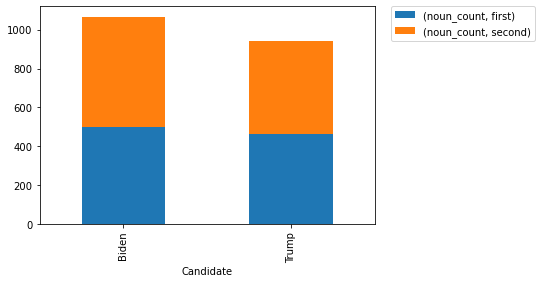

In [101]:
nouns_use.groupby(["Candidate", 'debate']).sum().astype(int).unstack().plot(kind = "bar", stacked = True);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Biden uses a broader set of nouns than trump. Including Pronouns and regular nouns, Biden used 497 and 569 nouns in the first and second debates respectively compared to Trump's 461 and 481.

## 4. Report the type-token ratio for each of the candidates (Trump & Biden), based on pooling the data from the two debates, and interpret the differences between the two candidates.

In text analysis, a 'type' is a unique word, whereas a 'token' is any word.  For example, the sentence

"One fish, two fish, red fish, blue fish"

contains 8 tokens, but 5 types (one, two, red, blue, fish).

Interestingly, the type-token ratio can be used to monitor changes in the use of vocabulary items in children with under-developed vocabulary and/or word finding difficulties and, for example, in adults who have suffered a stroke and who consequently exhibit word retrieval difficulties and naming difficulties. [Ref](https://www.sltinfo.com/type-token-ratio/)

In [102]:
def token_count(df):
    token_df = create_token_df(df)
    return len(token_df.text)

def type_count(df):
    token_df = create_token_df(df)
    return len(token_df.text.unique())

In [103]:
type_token = pd.DataFrame(np.array([
    ['Biden', 'first', token_count(biden_first), type_count(biden_first)],
    ['Trump', 'first', token_count(trump_first), type_count(trump_first)],
    ['Biden', 'second', token_count(biden_second), type_count(biden_second)],
    ['Trump', 'second', token_count(trump_second), type_count(trump_second)]
]), columns=['Candidate', 'debate', 'token_count', 'type_count'])
type_token

,Candidate,debate,token_count,type_count
0,Biden,first,6857,1218
1,Trump,first,7583,1134
2,Biden,second,7497,1347
3,Trump,second,7935,1183


In [104]:
type_token['ratio'] = type_token['type_count'].astype(int) / type_token['token_count'].astype(int)
type_token

,Candidate,debate,token_count,type_count,ratio
0,Biden,first,6857,1218,0.177629
1,Trump,first,7583,1134,0.149545
2,Biden,second,7497,1347,0.179672
3,Trump,second,7935,1183,0.149086


Biden has a higher type-token ratio (about 3% in each debate), implying that Trump reuses words more frequently than Biden. 

## 5. Compare the use of named entities by the candidates (Trump & Biden) in their town hall meetings.  What patterns, if any, do you see?  

spaCy supports the following Named Entity types:
PERSON, NORP (nationalities, religious and political groups), FAC (buildings, airports etc.), ORG (organizations), GPE (countries, cities etc.), LOC (mountain ranges, water bodies etc.), PRODUCT (products), EVENT (event names), WORK_OF_ART (books, song titles), LAW (legal document titles), LANGUAGE (named languages), DATE, TIME, PERCENT, MONEY, QUANTITY, ORDINAL and CARDINAL.

You might want to use some visualization techniques to support your claims.

In [105]:
trump_th = pd.read_csv(base + 'us_election_2020_trump_town_hall.csv')
biden_th = pd.read_csv(base + 'us_election_2020_biden_town_hall.csv')

In [106]:
# speakers names look accurate
print(biden_th.speaker.unique())
print(trump_th.speaker.unique())

['George Stephanopoulos' 'Joe Biden' 'Nicholas Fed' 'Kelly Lee'
 'Anthony Archer' 'Voice Over' 'Cedric Humphrey' 'George Stephanopoulus'
 'Angelia Politarhos' 'Speaker 1' 'Nathan Osburn' 'Andrew Lewis'
 'Speaker 2' 'Michele Ellison' 'Mark Hoffman' 'Mieke Haeck' 'Speaker 3'
 'Keenan Wilson']
['Savannah Guthrie' 'Speaker 1' 'President Trump' 'Jacqueline Lugo'
 'Barbara Peña' 'Isabella Peña' 'Savannah' 'Cristy Montesinos Alonso'
 'Adam Schucher' 'Moriah Geene' 'Cindy Velez' 'Paulette Dale']


In [107]:
biden_only = concat_text(biden_th[biden_th.speaker == 'Joe Biden'])
trump_only = concat_text(trump_th[trump_th.speaker == 'President Trump'])

In [108]:
# insert your code here
def get_named_entities(text):
    doc = nlp(text)
    labels = [x.label_ for x in doc.ents]
    return Counter(labels)

In [109]:
get_named_entities(biden_only)

Counter({'ORDINAL': 19,
         'CARDINAL': 119,
         'DATE': 36,
         'NORP': 21,
         'MONEY': 10,
         'TIME': 1,
         'GPE': 2,
         'QUANTITY': 2})

In [110]:
get_named_entities(trump_only)

Counter({'DATE': 40,
         'TIME': 3,
         'ORDINAL': 3,
         'CARDINAL': 55,
         'NORP': 11,
         'MONEY': 1,
         'QUANTITY': 1,
         'GPE': 1})

Biden uses more named entities. Specifically, he uses more ordinal and cardinal nouns meaning that he was likely more quantitative. This is supported by the fact that Biden used 10 'MONEY' entities to Trump's 1 (surprisingly).

He also used more NORP, implying that he is either more familiar or interested in speaking about nationalities, religious or political groups. 

## 6. Generate a word cloud for Trump's town hall (use only Trump's words) and one for Biden's town hall (again, use only Biden's words).  Compare and contrast the two word clouds.

Install a word cloud generating package like the one from https://github.com/amueller/word_cloud

In [111]:
import os

from os import path
from wordcloud import WordCloud

def create_wordcloud(text):
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
#     wordcloud = WordCloud(max_font_size=40).generate(text)
#     plt.figure()
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
    plt.show()

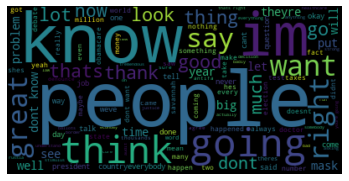

In [112]:
create_wordcloud(trump_only)

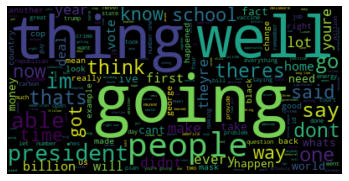

In [113]:
create_wordcloud(biden_only)

Trump's largest words are 'know', 'people', 'im', 'think', 'going' as in "People I know think I'm going" (lol). He loves to talk about himself ad promote his "success" quoting "people say ..." all the time. 

Biden's biggest words are 'well', 'going', 'thing', 'people', 'president'. While there is some overlap, clearly these words are looking forward to his eventual presidency.

## 7. Sentiment analysis of Trump vs. Biden in second debate

Note that you will want to review the video on Sentiment Analysis with NLTK and spaCy from the pre-recorded lectures.

Perform a sentiment analysis that compares the sentiment of the two candidates (Trump & Biden) in the second debate.  

There are several ways to do this.  In its simplest form, you could determine the sentiment for each utterance, the perform some mathematical summary (sum, mean, etc.) A slightly more elegant solution would involve tracking how sentiment changes over the course of the debate for each of the candidates.  A further extension of your work might use the [pandas.DataFrame.rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) method to calculate rolling averages, although using that function will probably require you to also learn about [time functions in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

No matter what approach you choose, you should be sure to use visualizations in your answer.  As always, provide an interpretation of your results, including any visualizations (i.e. don't just provide a visualization, explain what's interesting that you see in your visualizations).

In [114]:
# insert your code here
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()
def sentiment_scores(docx):
    return sent_analyzer.polarity_scores(docx.text)

In [115]:
from spacy.tokens import Doc
Doc.set_extension("sentimenter",getter=sentiment_scores)

ValueError: [E090] Extension 'sentimenter' already exists on Doc. To overwrite the existing extension, set `force=True` on `Doc.set_extension`.

In [ ]:
biden_second['rating'] = biden_second['text'].apply(lambda x: nlp(x)._.sentimenter['compound'])
trump_second['rating'] = trump_second['text'].apply(lambda x: nlp(x)._.sentimenter['compound'])

biden_first['rating'] = biden_first['text'].apply(lambda x: nlp(x)._.sentimenter['compound'])
trump_first['rating'] = trump_first['text'].apply(lambda x: nlp(x)._.sentimenter['compound'])

In [ ]:
sentiment = pd.DataFrame(np.array([
    ['Biden', 'first', biden_first.rating.mean()],
    ['Trump', 'first', trump_first.rating.mean()],
    ['Biden', 'second', biden_second.rating.mean()],
    ['Trump', 'second', trump_second.rating.mean()]
]), columns=['Candidate', 'debate', 'sentiment', ])
sentiment

In [ ]:
sentiment.groupby(["Candidate", 'debate']).sum().astype(float).unstack().plot(kind = "bar");

For the second debate, Biden scored a compound sentiment rating of 0.01, which is slightly more positive than perfectly neutral. Surprisingly, Trump scored higher at 0.03. I recall the Trump was on 'better behavior' since the first debate which was particularly vicious, especially on the part of Trump.

I attempted to confirm this hypothesis by similarly evaluating the first debate, but to my surprise, Trump's sentiment was virtually the same in both debates. However, Biden seems to have taken on a much more positive sentiment in the first debate.

# Please submit your notebook in .IPYNB and .HTML formats

We **strongly** suggest running all cells from top to bottom before you submit your notebook.